In [1]:
import settrade_v2
from settrade_v2 import Investor
from settrade_v2 import market
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go
from scipy.signal import argrelextrema
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout #
from keras.callbacks import ModelCheckpoint
from keras import optimizers

In [2]:
stock_data = pd.read_csv('NDX_2005_2022_1.csv')
#stock_data = pd.read_csv('GOOG_2014_2022.csv')
stock_data.head()
df = stock_data
All_af = df
df_close = df['close']
df_datatime = df['datetime']
df_train_3 = df[:-756:]
Y1 = df[:-252:]
Y3 = df[:-756:]
Y5 = df[:-1259:]
df[:-251:]
pd.to_numeric(df["open"],downcast='float')
pd.to_numeric(df["high"],downcast='float')
pd.to_numeric(df["low"],downcast='float')
pd.to_numeric(df["volume"],downcast='float')
pd.to_numeric(df["close"],downcast='float')
pd.to_numeric(df["RSI"],downcast='float')
pd.to_numeric(df["ROC"],downcast='float')
result = df.dtypes
result 

datetime     object
symbol       object
open        float64
high        float64
low         float64
close       float64
volume        int64
cnange      float64
gain        float64
loss        float64
RSI         float64
ROC         float64
dtype: object

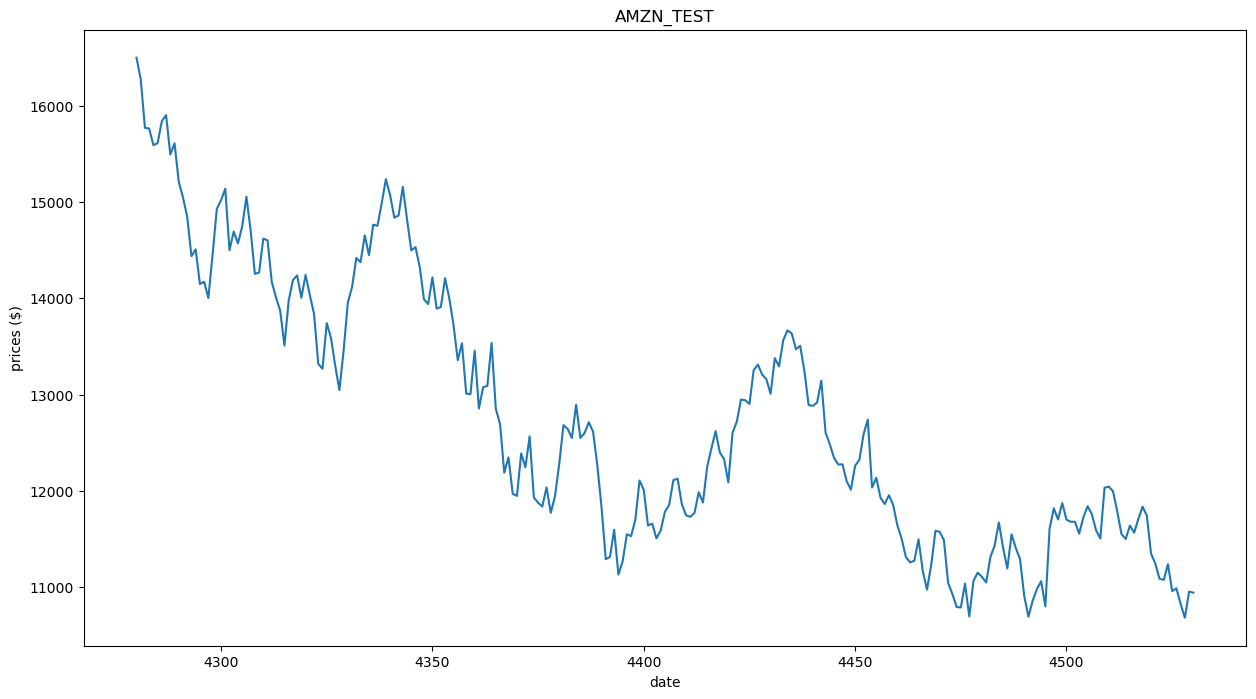

In [3]:
#df_close = df['close']
plt.figure(figsize=(15, 8))
plt.title('AMZN_TEST')
plt.plot(df['close'][-251::])
#plt.plot(df_close[:-252:])
plt.xlabel('date')
plt.ylabel('prices ($)')
plt.savefig('AMZN_TEST.png')

In [4]:
print('Samples:', df.shape)
print('Train set:', df[:-251].shape)

Samples: (4531, 12)
Train set: (4280, 12)


In [5]:
#Close
close_prices = df['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* (4280/4531))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
#y_test = values[training_data_len:]
y_test = scaled_data[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [7]:
# GRU
model = Sequential()
step = 60
#model.add(GRU(units=350, return_sequences=True, input_shape=(step, 1), activation='tanh'))
#model.add(GRU(units=300, return_sequences=True, input_shape=(step, 1), activation='tanh'))
#model.add(GRU(units=250, return_sequences=True, input_shape=(step, 1), activation='tanh'))
#model.add(GRU(units=200, return_sequences=True, input_shape=(step, 1), activation='tanh'))
#model.add(GRU(units=150, return_sequences=True, input_shape=(step, 1), activation='tanh'))
#model.add(GRU(units=100, return_sequences=True, input_shape=(step, 1), activation='tanh'))
model.add(GRU(units=50, input_shape=(step, 1), activation='tanh'))


#model.add(layers.LSTM(250,activation='linear', return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(layers.LSTM(200,activation='linear', return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(layers.LSTM(150,activation='linear', return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(layers.LSTM(100,activation='linear', return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(layers.LSTM(50, activation='linear',return_sequences=False))
model.add(Dense(50 , input_shape=(step, 1), activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50 , input_shape=(step, 1), activation='tanh'))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')#,metrics = ['accuracy'])

#model.summary()

2023-05-09 03:48:16.799455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [9]:
history = model.fit(x_train, y_train, batch_size= 64, epochs=30,validation_data=(x_test,y_test), verbose=1,callbacks=callbacks_list)

Epoch 1/30
64/66 [============================>.] - ETA: 0s - loss: 0.0072
Epoch 1: val_loss improved from inf to 0.00040, saving model to Weights-001--0.00040.hdf5
66/66 [==============================] - 2s 19ms/step - loss: 0.0070 - val_loss: 4.0113e-04
Epoch 2/30
65/66 [============================>.] - ETA: 0s - loss: 9.3843e-04
Epoch 2: val_loss improved from 0.00040 to 0.00039, saving model to Weights-002--0.00039.hdf5
66/66 [==============================] - 1s 16ms/step - loss: 9.3063e-04 - val_loss: 3.8935e-04
Epoch 3/30
65/66 [============================>.] - ETA: 0s - loss: 7.0976e-04
Epoch 3: val_loss did not improve from 0.00039
66/66 [==============================] - 1s 15ms/step - loss: 7.0867e-04 - val_loss: 5.4396e-04
Epoch 4/30
65/66 [============================>.] - ETA: 0s - loss: 6.1601e-04
Epoch 4: val_loss did not improve from 0.00039
66/66 [==============================] - 1s 15ms/step - loss: 6.1271e-04 - val_loss: 4.6435e-04
Epoch 5/30
65/66 [============

In [10]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
test_mse = model.evaluate(x_test, y_test, verbose=0)
print(train_mse, test_mse)

2.6982010240317322e-05 0.00028956509777344763


In [11]:
# Load wights file of the best model :
wights_file = 'Weights-030--0.00029.hdf5' # choose the best checkpoint 
model.load_weights(wights_file) # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [12]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8/8 [==============================] - 0s 4ms/step


12761.363927640063

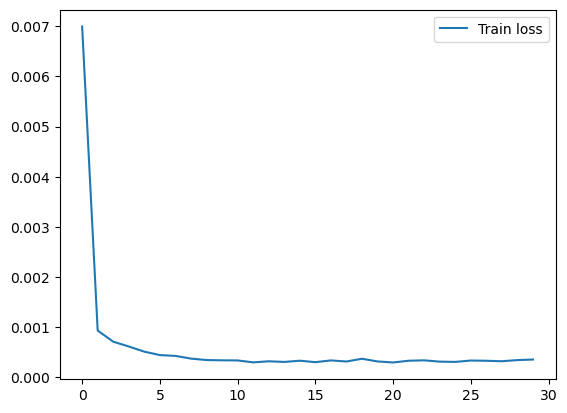

In [13]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [14]:
#เข้าซื้อขายด้วย RSI
df2022 = df[-251::]
predictions_pd = model.predict(x_test)
predictions_pd = scaler.inverse_transform(predictions_pd)
Hold = 0
n_train = 4280
Profit_pair = []
pair=[0,0]
Draw_down_high = 0
Draw_down_low = 0
All_Draw_down = []
for i in range(len(df2022)):
    predictions = predictions_pd[i]
    predictions =predictions[0]
    if i+1 == len(df2022):
        break
    #print(i)
    #print(predictions[0])
    #print(df2022['RSI'][i+n_train])
    #print(i+n_train)
    #print(df2022['low'][i+1+n_train])
    #print(df2022['high'][i+1+n_train])
    
    if df2022['RSI'][i+n_train] <= 30 and Hold == 0 :
        if int(df2022['low'][i+1+n_train]) <= predictions <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' BUY  : ',df2022['symbol'][i+n_train],'          ',predictions)
            Hold = predictions
            pair[0] = predictions
    elif df2022['RSI'][i+n_train] >= 70 and Hold > 0 :
        if df2022['low'][i+1+n_train] <= predictions*0.9 <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',predictions*0.9)
            pair[1] = predictions*0.9
            Hold = 0
            
        else:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',df2022['close'][i+1+n_train])
            pair[1] = df2022['close'][i+1+n_train]
            Hold = 0
    elif int(df2022['low'][i+1+n_train]) <= Hold*0.9 <= df2022['high'][i+1+n_train]:
        print(df2022['datetime'][i+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',Hold*0.9)
        pair[1] = Hold*0.9
        Hold = 0
    if pair[0] > 0 and pair[1] > 0:
        Profit_pair.append(pair)
        pair = [0,0]
    
    #DrawDown
    if Hold != 0 :
        Draw_down_high = Hold
        Draw_down_low = Hold
    if df2022['high'][i+n_train] > Draw_down_high :
        Draw_down_high = df2022['high'][i+n_train]
    
    if Draw_down_high != 0 and Hold != 0 :
        if Draw_down_low > df2022['low'][i+n_train]:
            Draw_down_low = df2022['low'][i+n_train]
    if Hold == 0 :
        if Draw_down_high != 0 and Draw_down_low != 0 :
            #print('1')
            All_Draw_down.append(((Draw_down_low-Draw_down_high)/Draw_down_high)*100)
            Draw_down_high = 0 
            Draw_down_low = 0
        
for i in Profit_pair:
    print(i)

for i in All_Draw_down:
    print(i)

8/8 [==============================] - 0s 4ms/step
2022-04-26  BUY  :  NASDAQ:NDX            13444.543
2022-05-10  SELL :  NASDAQ:NDX            12100.088671875
2022-09-07  BUY  :  NASDAQ:NDX            12151.265
2022-10-07  SELL :  NASDAQ:NDX            10936.13818359375
2022-12-22  BUY  :  NASDAQ:NDX            11102.826
[13444.543, 12100.088671875]
[12151.265, 10936.13818359375]
-9.731479692475133
-5.583243127905524


In [15]:
#Allprofit
All_profit = 0
for i in Profit_pair:
    print('Profit per pair : ',((i[1]-i[0])/i[0])*100,'%')
    All_profit = All_profit +(((i[1]-i[0])/i[0])*100)
print()
print('All_profit : ',All_profit,'%')

Profit per pair :  -9.999999999999995 %
Profit per pair :  -10.0 %

All_profit :  -19.999999999999993 %


In [16]:
#เข้าซื้อชายด้วย ROC
df2022 = df[-251::]
predictions_pd = model.predict(x_test)
predictions_pd = scaler.inverse_transform(predictions_pd)
Hold = 0
n_train = 4280
Profit_pair = []
pair=[0,0]
Draw_down_high = 0
Draw_down_low = 0
All_Draw_down = []
for i in range(len(df2022)):
    predictions = predictions_pd[i]
    predictions =predictions[0]
    if i+1 == len(df2022):
        break
    #print(i)
    #print(predictions[0])
    #print(df2022['RSI'][i+n_train])
    #print(i+n_train)
    #print(df2022['low'][i+1+n_train])
    #print(df2022['high'][i+1+n_train])
    
    if df2022['ROC'][i+n_train] <= -6.5 and Hold == 0 :
        if int(df2022['low'][i+1+n_train]) <= predictions <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' BUY  : ',df2022['symbol'][i+n_train],'          ',predictions)
            Hold = predictions
            pair[0] = predictions
    elif df2022['ROC'][i+n_train] >= 6.5 and Hold > 0 :
        if df2022['low'][i+1+n_train] <= predictions*0.9 <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',predictions*0.9)
            pair[1] = predictions*0.9
            Hold = 0
            
        else:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',df2022['close'][i+1+n_train])
            pair[1] = df2022['close'][i+1+n_train]
            Hold = 0
    #elif int(df2022['low'][i+1+n_train]) <= Hold*0.9 <= df2022['high'][i+1+n_train]:
     #   print(df2022['datetime'][i+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',Hold*0.9)
      #  pair[1] = Hold*0.9
       # Hold = 0
    if pair[0] > 0 and pair[1] > 0:
        Profit_pair.append(pair)
        pair = [0,0]
    
    #DrawDown
    #DrawDown
    if Hold != 0 :
        Draw_down_high = Hold
        Draw_down_low = Hold
    if df2022['high'][i+n_train] > Draw_down_high :
        Draw_down_high = df2022['high'][i+n_train]
    
    if Draw_down_high != 0 and Hold != 0 :
        if Draw_down_low > df2022['low'][i+n_train]:
            Draw_down_low = df2022['low'][i+n_train]
    if Hold == 0 :
        if Draw_down_high != 0 and Draw_down_low != 0 :
            #print('1')
            All_Draw_down.append(((Draw_down_low-Draw_down_high)/Draw_down_high)*100)
            Draw_down_high = 0 
            Draw_down_low = 0
        
for i in Profit_pair:
    print(i)

for i in All_Draw_down:
    print(i)

8/8 [==============================] - 0s 4ms/step
2022-01-20  BUY  :  NASDAQ:NDX            15210.674
2022-03-24  SELL :  NASDAQ:NDX            14765.69
2022-04-19  BUY  :  NASDAQ:NDX            13922.612
2022-06-08  SELL :  NASDAQ:NDX            12615.13
2022-06-15  BUY  :  NASDAQ:NDX            11475.382
2022-07-07  SELL :  NASDAQ:NDX            12109.05
2022-09-02  BUY  :  NASDAQ:NDX            12302.314
2022-10-31  SELL :  NASDAQ:NDX            11405.57
2022-12-21  BUY  :  NASDAQ:NDX            11153.202
[15210.674, 14765.69]
[13922.612, 12615.13]
[11475.382, 12109.05]
[12302.314, 11405.57]
-5.4246369191042785
-9.969625486304563
-4.817226920664481
-9.1236039966438


In [17]:
#Allprofit
All_profit = 0
for i in Profit_pair:
    print('Profit per pair : ',((i[1]-i[0])/i[0])*100,'%')
    All_profit = All_profit +(((i[1]-i[0])/i[0])*100)
print()
print('All_profit : ',All_profit,'%')

Profit per pair :  -2.9254708447051887 %
Profit per pair :  -9.391070268093973 %
Profit per pair :  5.521978903377647 %
Profit per pair :  -7.289233717296274 %

All_profit :  -14.083795926717787 %


In [20]:
#Simulate trading in a year with 100,000
#Simulation with daily retrieval of new data(Python Schedule) and retrieval of all data at once The same results were obtained from the experiment. Therefore, it uses a method to retrieve all data at once to save resources.
print('--------------------------------RSI--------------------------------------')
print('-------------------------------------------------------------------------')
#เข้าซื้อชายด้วย RSI
df2022 = df[-251::]
predictions_pd = model.predict(x_test)
predictions_pd = scaler.inverse_transform(predictions_pd)
Hold = 0
n_train = 4280
Profit_pair = []
pair=[0,0]
Draw_down_high = 0
Draw_down_low = 0
All_Draw_down = []
n_Hold = 0
All_Money = 100000

for i in range(len(df2022)):
    predictions = predictions_pd[i]
    predictions =predictions[0]
    if i+1 == len(df2022):
        break
    #print(i)
    #print(predictions[0])
    #print(df2022['RSI'][i+n_train])
    #print(i+n_train)
    #print(df2022['low'][i+1+n_train])
    #print(df2022['high'][i+1+n_train])
    
    if df2022['RSI'][i+n_train] <= 30 and Hold == 0 :
        if int(df2022['low'][i+1+n_train]) <= predictions <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' BUY  : ',df2022['symbol'][i+n_train],'          ',predictions)
            
             
            print('              BUY    : ', All_Money//predictions)
            n_Hold = All_Money//predictions
            print('              Money  : ', All_Money - (predictions*(All_Money//predictions)))
            All_Money = All_Money - (predictions*(All_Money//predictions))
            
            Hold = predictions
            pair[0] = predictions
    elif df2022['RSI'][i+n_train] >= 70 and Hold > 0 :
        if df2022['low'][i+1+n_train] <= predictions*0.9 <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',predictions*0.9)
            
            print('              SELL   : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('              Money  : ', All_Money )
            
            pair[1] = predictions*0.9
            Hold = 0
            
        else:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',df2022['close'][i+1+n_train])
            
            print('              SELL   : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('              Money  : ', All_Money )
            
            pair[1] = df2022['close'][i+1+n_train]
            Hold = 0
    elif int(df2022['low'][i+1+n_train]) <= Hold*0.9 <= df2022['high'][i+1+n_train]:
        print(df2022['datetime'][i+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',Hold*0.9)
        
        print('              SELL   : ', n_Hold*predictions)
        All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
        print('              Money  : ', All_Money )
            
        pair[1] = Hold*0.9
        Hold = 0
    if pair[0] > 0 and pair[1] > 0:
        Profit_pair.append(pair)
        pair = [0,0]
    
    #DrawDown
    if Hold != 0 :
        Draw_down_high = Hold
        Draw_down_low = Hold
    if df2022['high'][i+n_train] > Draw_down_high :
        Draw_down_high = df2022['high'][i+n_train]
    
    if Draw_down_high != 0 and Hold != 0 :
        if Draw_down_low > df2022['low'][i+n_train]:
            Draw_down_low = df2022['low'][i+n_train]
    if Hold == 0 :
        if Draw_down_high != 0 and Draw_down_low != 0 :
            #print('1')
            All_Draw_down.append(((Draw_down_low-Draw_down_high)/Draw_down_high)*100)
            Draw_down_high = 0 
            Draw_down_low = 0

print('-------------------------------------------------------------------------')
print('------------------------RSI With Out Stop Loss---------------------------')
print('-------------------------------------------------------------------------')
#เข้าซื้อชายด้วย RSI
df2022 = df[-251::]
predictions_pd = model.predict(x_test)
predictions_pd = scaler.inverse_transform(predictions_pd)
Hold = 0
n_train = 4280
Profit_pair = []
pair=[0,0]
Draw_down_high = 0
Draw_down_low = 0
All_Draw_down = []

n_Hold = 0
All_Money = 100000

for i in range(len(df2022)):
    predictions = predictions_pd[i]
    predictions =predictions[0]
    if i+1 == len(df2022):
        break
    #print(i)
    #print(predictions[0])
    #print(df2022['RSI'][i+n_train])
    #print(i+n_train)
    #print(df2022['low'][i+1+n_train])
    #print(df2022['high'][i+1+n_train])
    
    if df2022['RSI'][i+n_train] <= 30 and Hold == 0 :
        if int(df2022['low'][i+1+n_train]) <= predictions <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' BUY  : ',df2022['symbol'][i+n_train],'          ',predictions)
            
             
            print('              BUY    : ', All_Money//predictions)
            n_Hold = All_Money//predictions
            print('              Money  : ', All_Money - (predictions*(All_Money//predictions)))
            All_Money = All_Money - (predictions*(All_Money//predictions))
            
            Hold = predictions
            pair[0] = predictions
    elif df2022['RSI'][i+n_train] >= 70 and Hold > 0 :
        if df2022['low'][i+1+n_train] <= predictions*0.9 <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',predictions*0.9)
            
            print('              SELL   : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('              Money  : ', All_Money )
            
            pair[1] = predictions*0.9
            Hold = 0
            
        else:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',df2022['close'][i+1+n_train])
            print('              SELL   : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('              Money  : ', All_Money )
            
            pair[1] = df2022['close'][i+1+n_train]
            Hold = 0
    #elif int(df2022['low'][i+1+n_train]) <= Hold*0.9 <= df2022['high'][i+1+n_train]:
     #   print(df2022['datetime'][i+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',Hold*0.9)
      #  pair[1] = Hold*0.9
       # Hold = 0
    if pair[0] > 0 and pair[1] > 0:
        Profit_pair.append(pair)
        pair = [0,0]
    
    #DrawDown
    if Hold != 0 :
        Draw_down_high = Hold
        Draw_down_low = Hold
    if df2022['high'][i+n_train] > Draw_down_high :
        Draw_down_high = df2022['high'][i+n_train]
    
    if Draw_down_high != 0 and Hold != 0 :
        if Draw_down_low > df2022['low'][i+n_train]:
            Draw_down_low = df2022['low'][i+n_train]
    if Hold == 0 :
        if Draw_down_high != 0 and Draw_down_low != 0 :
            #print('1')
            All_Draw_down.append(((Draw_down_low-Draw_down_high)/Draw_down_high)*100)
            Draw_down_high = 0 
            Draw_down_low = 0
print('-------------------------------------------------------------------------')
print('-----------------------------Price ROC-----------------------------------')
print('-------------------------------------------------------------------------')

#เข้าซื้อชายด้วย ROC
df2022 = df[-251::]
predictions_pd = model.predict(x_test)
predictions_pd = scaler.inverse_transform(predictions_pd)
Hold = 0
n_train = 4280
Profit_pair = []
pair=[0,0]
Draw_down_high = 0
Draw_down_low = 0
All_Draw_down = []

n_Hold = 0
All_Money = 100000


for i in range(len(df2022)):
    predictions = predictions_pd[i]
    predictions =predictions[0]
    if i+1 == len(df2022):
        break
    #print(i)
    #print(predictions[0])
    #print(df2022['RSI'][i+n_train])
    #print(i+n_train)
    #print(df2022['low'][i+1+n_train])
    #print(df2022['high'][i+1+n_train])
    
    if df2022['ROC'][i+n_train] <= -6.5 and Hold == 0 :
        if int(df2022['low'][i+1+n_train]) <= predictions <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' BUY  : ',df2022['symbol'][i+n_train],'          ',predictions)
            
            print('              BUY    : ', All_Money//predictions)
            n_Hold = All_Money//predictions
            print('              Money  : ', All_Money - (predictions*(All_Money//predictions)))
            All_Money = All_Money - (predictions*(All_Money//predictions))
            
            Hold = predictions
            pair[0] = predictions
    elif df2022['ROC'][i+n_train] >= 6.5 and Hold > 0 :
        if df2022['low'][i+1+n_train] <= predictions*0.9 <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',predictions*0.9)
            
            print('              SELL   : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('              Money  : ', All_Money )
            
            pair[1] = predictions*0.9
            Hold = 0
            
        else:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',df2022['close'][i+1+n_train])
            
            print('              SELL    : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions)#- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('               Money  : ', All_Money )
            
            pair[1] = df2022['close'][i+1+n_train]
            Hold = 0
    elif int(df2022['low'][i+1+n_train]) <= Hold*0.9 <= df2022['high'][i+1+n_train]:
        print(df2022['datetime'][i+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',Hold*0.9)
        
        print('              SELL   : ', n_Hold*predictions)
        All_Money = All_Money + (n_Hold*predictions)#- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
        #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
        #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
        print('              Money  : ', All_Money )
            
            
        pair[1] = Hold*0.9
        Hold = 0
    if pair[0] > 0 and pair[1] > 0:
        Profit_pair.append(pair)
        pair = [0,0]
    
    #DrawDown
    #DrawDown
    if Hold != 0 :
        Draw_down_high = Hold
        Draw_down_low = Hold
    if df2022['high'][i+n_train] > Draw_down_high :
        Draw_down_high = df2022['high'][i+n_train]
    
    if Draw_down_high != 0 and Hold != 0 :
        if Draw_down_low > df2022['low'][i+n_train]:
            Draw_down_low = df2022['low'][i+n_train]
    if Hold == 0 :
        if Draw_down_high != 0 and Draw_down_low != 0 :
            #print('1')
            All_Draw_down.append(((Draw_down_low-Draw_down_high)/Draw_down_high)*100)
            Draw_down_high = 0 
            Draw_down_low = 0
print('-------------------------------------------------------------------------')
print('---------------------Price ROC With Out Stop Loss------------------------')
print('-------------------------------------------------------------------------')

#เข้าซื้อชายด้วย ROC
df2022 = df[-251::]
predictions_pd = model.predict(x_test)
predictions_pd = scaler.inverse_transform(predictions_pd)
Hold = 0
n_train = 4280
Profit_pair = []
pair=[0,0]
Draw_down_high = 0
Draw_down_low = 0
All_Draw_down = []

n_Hold = 0
All_Money = 100000


for i in range(len(df2022)):
    predictions = predictions_pd[i]
    predictions =predictions[0]
    if i+1 == len(df2022):
        break
    #print(i)
    #print(predictions[0])
    #print(df2022['RSI'][i+n_train])
    #print(i+n_train)
    #print(df2022['low'][i+1+n_train])
    #print(df2022['high'][i+1+n_train])
    
    if df2022['ROC'][i+n_train] <= -6.5 and Hold == 0 :
        if int(df2022['low'][i+1+n_train]) <= predictions <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' BUY  : ',df2022['symbol'][i+n_train],'          ',predictions)
            
            print('              BUY    : ', All_Money//predictions)
            n_Hold = All_Money//predictions
            print('              Money  : ', All_Money - (predictions*(All_Money//predictions)))
            All_Money = All_Money - (predictions*(All_Money//predictions))
            
            Hold = predictions
            pair[0] = predictions
    elif df2022['ROC'][i+n_train] >= 6.5 and Hold > 0 :
        if df2022['low'][i+1+n_train] <= predictions*0.9 <= df2022['high'][i+1+n_train]:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',predictions*0.9)
            
            print('              SELL   : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions) #- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('              Money  : ', All_Money )
            
            pair[1] = predictions*0.9
            Hold = 0
            
        else:
            print(df2022['datetime'][i+1+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',df2022['close'][i+1+n_train])
            
            print('              SELL    : ', n_Hold*predictions)
            All_Money = All_Money + (n_Hold*predictions)#- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
            #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
            #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
            print('               Money  : ', All_Money )
            
            pair[1] = df2022['close'][i+1+n_train]
            Hold = 0
    #elif int(df2022['low'][i+1+n_train]) <= Hold*0.9 <= df2022['high'][i+1+n_train]:
     #   print(df2022['datetime'][i+n_train], ' SELL : ',df2022['symbol'][i+n_train],'          ',Hold*0.9)
      #  
       # print('              SELL   : ', n_Hold*predictions)
        #All_Money = All_Money + (n_Hold*predictions)#- (8(n_Hold*predictions)/10000)//1 - (119(n_Hold)/1000000)//1
        #print('              SEC Fee  : ', 0.0008(n_Hold*predictions)//1 )
        #print('              TAF Fee  : ', 0.000119(n_Hold)//1 )
        #print('              Money  : ', All_Money )
            
            
        pair[1] = Hold*0.9
        Hold = 0
    if pair[0] > 0 and pair[1] > 0:
        Profit_pair.append(pair)
        pair = [0,0]
    
    #DrawDown
    #DrawDown
    if Hold != 0 :
        Draw_down_high = Hold
        Draw_down_low = Hold
    if df2022['high'][i+n_train] > Draw_down_high :
        Draw_down_high = df2022['high'][i+n_train]
    
    if Draw_down_high != 0 and Hold != 0 :
        if Draw_down_low > df2022['low'][i+n_train]:
            Draw_down_low = df2022['low'][i+n_train]
    if Hold == 0 :
        if Draw_down_high != 0 and Draw_down_low != 0 :
            #print('1')
            All_Draw_down.append(((Draw_down_low-Draw_down_high)/Draw_down_high)*100)
            Draw_down_high = 0 
            Draw_down_low = 0
print('-------------------------------------------------------------------------')

--------------------------------RSI--------------------------------------
-------------------------------------------------------------------------
8/8 [==============================] - 0s 4ms/step
2022-04-26  BUY  :  NASDAQ:NDX            13444.543
              BUY    :  7.0
              Money  :  5888.19921875
2022-05-10  SELL :  NASDAQ:NDX            12100.088671875
              SELL   :  86364.919921875
              Money  :  92253.119140625
2022-09-07  BUY  :  NASDAQ:NDX            12151.265
              BUY    :  7.0
              Money  :  7194.2666015625
2022-10-07  SELL :  NASDAQ:NDX            10936.13818359375
              SELL   :  80646.8564453125
              Money  :  87841.123046875
2022-12-22  BUY  :  NASDAQ:NDX            11102.826
              BUY    :  7.0
              Money  :  10121.33984375
-------------------------------------------------------------------------
------------------------RSI With Out Stop Loss---------------------------
-----------------